In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from batchgenerators.utilities.file_and_folder_operations import load_json
from nnunet.utilities import get_default_trainer_planer_name
from nnunet.paths import network_training_output_dir

# Constants
TASK_ID = 500
TASK_NAME = "Task500_Epaule"

In [20]:
# To recreate folder structure

# transform data from format : 
#     mDixon_e8/
#     ├── P1/
#     ├── P2/
#     ├── P3/
#     └── P4/
# to :
#     Task500_Epaule/
#     ├── dataset.json
#     ├── imagesTr
#     ├── (imagesTs)
#     └── labelsTr

MDIXON_INPUT_FOLDER = "/local/cnicol03/mDixon_e8" #originaly stored in /scratch/tgreni02/Projet/20_Epaule_Pialat/Data/mDixon_e8/
DATA_ORGANIZATION_FILE = "../dataOrganization.json" #json file containing data divided in training and test set
!python conversion_data_tdsi.py -i {MDIXON_INPUT_FOLDER} -t {TASK_ID} -f {DATA_ORGANIZATION_FILE}



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

copying file: /local/cnicol03/mDixon_e8/P6/P6_WIP_mDixon_ax_BW036_2nsa_sshot_HR2_TE2_3_FFE_CLEAR_20190710085134_1301_e8.nii.gz  --->  /local/cnicol03/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_Epaule/imagesTs


compressing label files
copying file: /local/cnicol03/mDixon_e8/P9/P9_WIP_mDixon_ax_BW036_2nsa_sshot_HR2_TE2_3_FFE_CLEAR_20190619125606_1101_e8.nii.gz  --->  /local/cnicol03/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/Task501_Epaule/imagesTs


compressing label files
copying file: /local/cnicol03/mDixon_e8/P19/P19_WIP_mDixon_ax_BW036_2nsa_sshot_HR2_TE2_3_FFE_CLEAR_20190812083414_1101_e8.nii.gz  --->  /local/cnicol0

This notebook demonstrates 2 main steps to train models and find the best ensemble of models. The TDSI21-Shoulder-Muscle-Segmentation must be installed by following `TDSI21-Shoulder-Muscle-Segmentation/readme.md` instructions. Paths for nnUNet must be correctly set up, please follow `TDSI21-Shoulder-Muscle-Segmentation/documentation/setting_up_paths.md`

With nnUNet, models are trained with 5-fold cross-validation. 
The postprocessing is determined after each fold training and the final postprecessing is determined by gathering each fold posprocessing.

# 1. Train one fold of a model

model could be "2d", "3d_fullres", "3d_cascade_fullres", "TransUNet2D", "TransUNet3D"

In [16]:
# Choose model and fold to train
model = "2d" # MODIFY HERE IF NEEDED
fold = 2 # MODIFY HERE IF NEEDED

# Get trainer and planner name to determine the model output directory
trainer, planner = get_default_trainer_planer_name(model)

In [ ]:
!nnUNet_train {model} {trainer} {TASK_NAME} {fold} --npz

The training progress is save as PNG image in /local/nnguye02/dataset/nnUNet_result/nnUNet/2d/Task500_Epaule/nnUNetTrainerV2__nnUNetPlansv2.1/fold_2


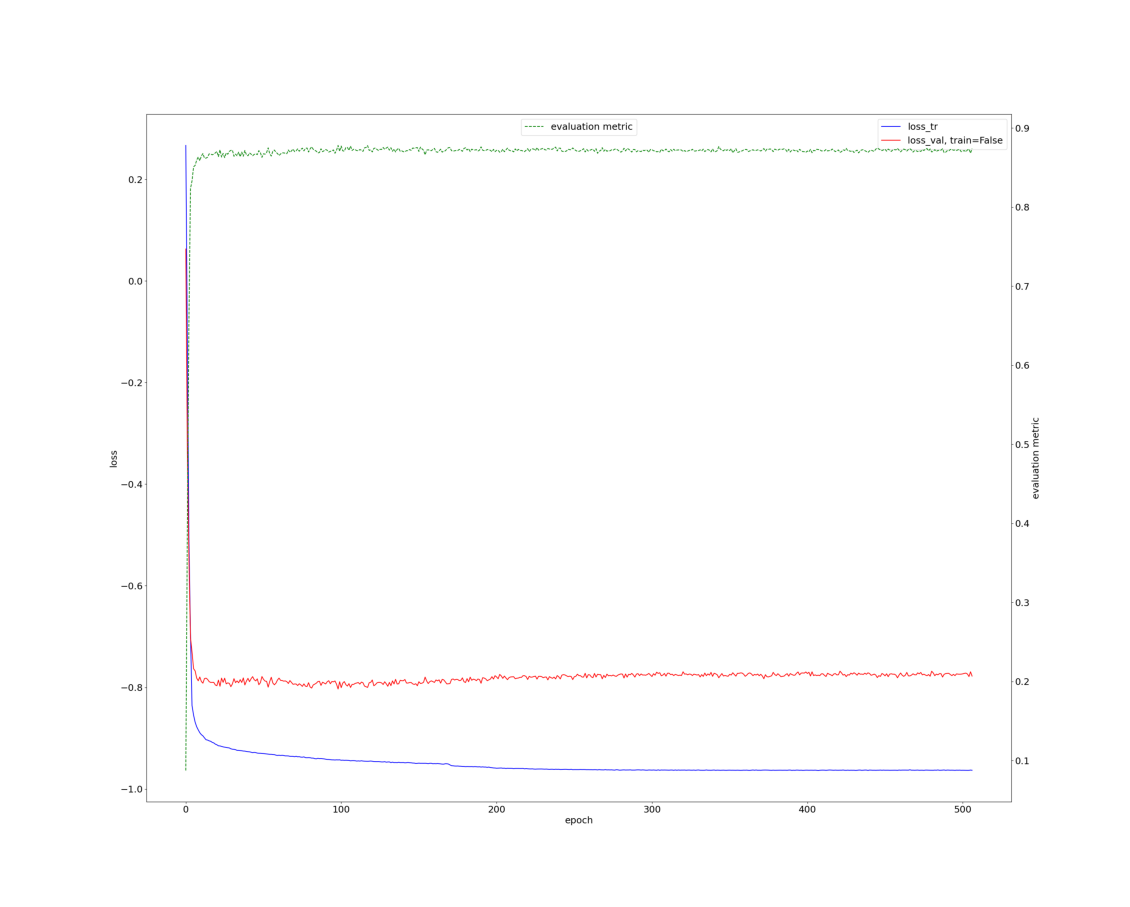

In [42]:
model_output_dir = os.path.join(network_training_output_dir, model, TASK_NAME, f"{trainer}__{planner}", f"fold_{fold}")

print(f"The training progress is save as PNG image in {model_output_dir}")

progress_png_path = os.path.join(model_output_dir, "progress.png")
progress_img = plt.imread(progress_png_path)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(progress_img)
plt.show()

# 2. Get the final postprocessing and find the best ensemble

In [6]:
!nnUNet_find_best_configuration -m {model} -t {TASK_ID}



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet


I will now ensemble combinations of the following models:
 ['2d']
2d 0.8634831073369049
Task500_Epaule submit model 2d 0.8634831073369049

Here is how you should predict test cases. Run in sequential order and replace all input and output folder names with your personalized ones

nnUNet_predict -i FOLDER_WITH_TEST_CASES -o OUTPUT_FOLDER_MODEL1 -tr nnUNetTrainerV2 -ctr nnUNetTrainerV2CascadeFullRes -m 2d -p nnUNetPlansv2.1 -t Task500_Epaule



Multiple model names can be selected in the `-m` argument. In this case, the best ensemble of two models or the best single model will be chosen based on Dice score on validation set. Once all folds are trained, the inference and test evaluation will be demonstrated in `inference.ipynb`.